## Importing/pre-processing the dataset

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv(filepath_or_buffer="pca_data.txt", sep="\s+", header=None)
# data_scaled = StandardScaler().fit_transform(data)
# data = pd.DataFrame(data_scaled)


## PCA Implementation

In [50]:
class PrincipalComponentAnalysis:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform (self, data):
        X = data - data.mean(axis=0)
        # print ("centered data", data)
        cov = X.cov()
        # print ("covariance matrix of cols", cov)
        eigvals, eigvecs = np.linalg.eig(cov)
        # print ("eigenvalues", eigvals.shape, "\n", eigvals)
        # print ("eigenvectors", eigvecs.shape,"\n", eigvecs)
        eigdf = pd.concat(
            [pd.DataFrame(np.transpose(eigvecs)),
            pd.DataFrame(eigvals, columns=['eigval'])], 
            axis=1)
        eigdf = eigdf.sort_values(by=["eigval"], ascending=[False])
        print(eigdf)
        eigdf = eigdf.drop(columns=["eigval"])
        PCs = eigdf.iloc[:self.n_components].to_numpy()
        # print("principal components:", PCs.shape, "\n",  PCs)

        data_pca = np.matmul(X, np.transpose(PCs))
        data_pca = np.transpose(data_pca)    # consistency with library functions
        return data_pca
    

## Plotting PCA

            0         1         2         3         4         5         6  \
0    0.018552  0.069414 -0.053575 -0.003926  0.025530  0.019491  0.033845   
1    0.042107 -0.005442  0.090640  0.047690 -0.069378 -0.000470  0.099256   
2    0.016363 -0.010414 -0.051993  0.036996 -0.036909 -0.006756 -0.077201   
3    0.098326 -0.028610  0.099327 -0.062597 -0.034951 -0.014677 -0.003636   
4   -0.011737  0.053445  0.039507 -0.066826 -0.065399 -0.043459 -0.008812   
..        ...       ...       ...       ...       ...       ...       ...   
166  0.087606 -0.044737 -0.139565 -0.039781  0.050063  0.002850  0.034529   
165  0.037556  0.049914  0.030530 -0.035083  0.015778 -0.046955 -0.026130   
164 -0.032657  0.030555  0.022839  0.022236  0.000526  0.009494 -0.028892   
142 -0.012818  0.021194  0.020270  0.022029 -0.046802 -0.084274 -0.012823   
141  0.043322  0.028077 -0.001877  0.001017  0.021141 -0.001526  0.077545   

            7         8         9  ...       491       492       493  \
0  

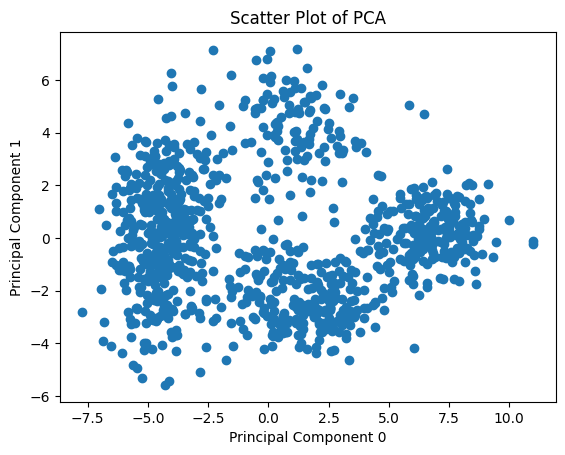

<Figure size 640x480 with 0 Axes>

In [51]:
data_pca = PrincipalComponentAnalysis(n_components=2).fit_transform(data)
print("pca", data_pca)
plt.scatter(np.transpose(data_pca)[0], np.transpose(data_pca)[1])
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.title('Scatter Plot of PCA')
plt.show()
plt.clf() 

## Plotting UMAP

umap [[15.969511    2.2220395 ]
 [ 0.89311826  6.8720427 ]
 [14.9794855   1.545406  ]
 ...
 [ 8.715876    7.450514  ]
 [-1.1346797   4.381979  ]
 [13.6314335   1.2801576 ]]


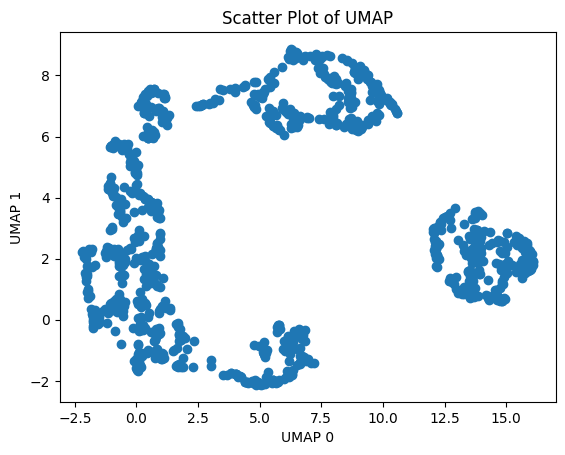

<Figure size 640x480 with 0 Axes>

In [52]:
import umap
data_umap = umap.UMAP(n_components=2).fit_transform(data)
print("umap", data_umap)
plt.scatter(np.transpose(data_umap)[0], np.transpose(data_umap)[1])
plt.xlabel('UMAP 0')
plt.ylabel('UMAP 1')
plt.title('Scatter Plot of UMAP')
plt.show()
plt.clf() 

## Plotting t-SNE

tsne [[-50.20855    -4.0429387]
 [ 22.673597   21.478657 ]
 [-44.09785    -7.0728655]
 ...
 [-16.173874   20.897266 ]
 [ 30.955362    7.335911 ]
 [-37.309193   -7.6207366]]


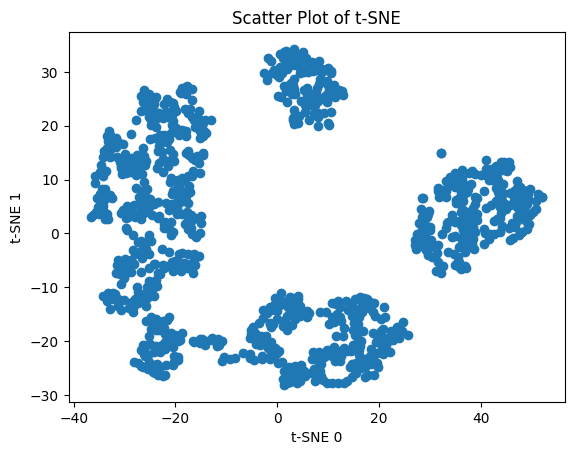

<Figure size 640x480 with 0 Axes>

In [53]:
from sklearn.manifold import TSNE
data_tsne = TSNE(n_components=2).fit_transform(data)
print("tsne", data_tsne)
plt.scatter(-np.transpose(data_tsne)[0], -np.transpose(data_tsne)[1])
plt.xlabel('t-SNE 0')
plt.ylabel('t-SNE 1')
plt.title('Scatter Plot of t-SNE')
plt.show()
plt.clf() 

scikit-learn library PCA (for comparison)

In [54]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2).fit_transform(data)
# print("pca", pca)
# plt.scatter(np.transpose(pca)[0], np.transpose(pca)[1])
# plt.xlabel('Principal Component 0')
# plt.ylabel('Principal Component 1')
# plt.title('Scatter Plot of scikit-learn PCA')
# plt.show()